### Part 3 - Testing difference between features prioritised by crypto and normal app users

By looking at the p-values for each of the regression models 
and also the interaction variable

[Polynomial Transformation]("https://stackoverflow.com/questions/45828964/how-to-add-interaction-term-in-python-sklearn")  
[Example Linear regression in SKlearn]("https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html")  
[Selecting columns in 2D arrays]("https://stackoverflow.com/questions/41659535/valueerror-x-and-y-must-be-the-same-size")  

In [95]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import matplotlib.pyplot as plt

In [96]:
# Load in the CSVs
df_crypto = pd.read_csv("sent_crypto.csv", index_col=0)
df_normal = pd.read_csv("sent_normal.csv", index_col=0)

# Create table with the interaction terms
df_crypto["is_crypto"] = 1
df_normal["is_crypto"] = 0

In [97]:
df_crypto

,reviewId,topic,sent_pol,sent_sub,rating,is_crypto
0,a1e76af3-a141-49b3-962e-50a43e6c56c0,A,0.671667,0.671667,5.0,1
1,8d18f2f9-0c5f-476a-be30-768e248d131a,A,0.522222,0.522222,3.0,1
2,9b76db60-591e-4080-83ac-231084066226,O,0.662500,0.662500,5.0,1
3,0c85d52c-453f-4f49-b0fa-82bab680670b,A,0.325000,0.325000,5.0,1
4,b253067e-d4a7-4fc4-8f8d-57e5817f4d71,A,-0.910000,-0.910000,4.0,1
...,...,...,...,...,...,...
4249,36d6caf0-8e03-4898-9248-4358387be0ac,A,-0.104063,-0.104063,1.0,1
4250,ffac6965-3de9-4d5b-9c36-5426d925dd12,A,0.558333,0.558333,5.0,1
4251,5d11a98a-6989-4244-85f2-be72ac295040,A,0.273333,0.273333,5.0,1
4252,e6a22ec1-d0ca-455a-b2aa-28b799fc0972,A,0.352083,0.352083,5.0,1


In [98]:
df_normal

,reviewId,topic,sent_pol,sent_sub,rating,is_crypto
0,748c2355-d884-463b-8c9a-46d9e8cfa1ea,O,0.369333,0.369333,1.0,0
1,40fe5012-ca9d-4aef-bfd5-d1a2b4de3be8,A,-0.022685,-0.022685,5.0,0
2,7444c5dc-8395-4890-9c47-5f690fb6f69b,C,-0.403333,-0.403333,1.0,0
3,ebfb12ca-6ac4-4134-bdd6-335002e8f3d2,A,0.433333,0.433333,5.0,0
4,29e8c8e8-6f05-4b3d-898e-2b2405ae1c7d,A,0.400000,0.400000,5.0,0
...,...,...,...,...,...,...
3428,9bb094d0-5796-40cc-97ae-8e5ef43fafbc,A,-1.000000,-1.000000,1.0,0
3429,c4e82ffa-71ab-4a7b-bf83-9aab29657153,A,0.800000,0.800000,4.0,0
3430,b28ce657-a318-454e-abd7-06d6db719655,A,0.511111,0.511111,5.0,0
3431,35bc4a50-a347-44d8-bdcb-0e259b024e5b,A,0.700000,0.700000,4.0,0


In [99]:
df_all = pd.concat([df_normal, df_crypto], ignore_index=True)
df_all

,reviewId,topic,sent_pol,sent_sub,rating,is_crypto
0,748c2355-d884-463b-8c9a-46d9e8cfa1ea,O,0.369333,0.369333,1.0,0
1,40fe5012-ca9d-4aef-bfd5-d1a2b4de3be8,A,-0.022685,-0.022685,5.0,0
2,7444c5dc-8395-4890-9c47-5f690fb6f69b,C,-0.403333,-0.403333,1.0,0
3,ebfb12ca-6ac4-4134-bdd6-335002e8f3d2,A,0.433333,0.433333,5.0,0
4,29e8c8e8-6f05-4b3d-898e-2b2405ae1c7d,A,0.400000,0.400000,5.0,0
...,...,...,...,...,...,...
7682,36d6caf0-8e03-4898-9248-4358387be0ac,A,-0.104063,-0.104063,1.0,1
7683,ffac6965-3de9-4d5b-9c36-5426d925dd12,A,0.558333,0.558333,5.0,1
7684,5d11a98a-6989-4244-85f2-be72ac295040,A,0.273333,0.273333,5.0,1
7685,e6a22ec1-d0ca-455a-b2aa-28b799fc0972,A,0.352083,0.352083,5.0,1


In [100]:
topic = "D"
df_topic = df_all[df_all["topic"] == topic]
#! Xi = feature of some sample i of all feature set X i.e. Xi = [poli, is_cryptoi]
X = df_topic.loc[:, ["sent_pol", "is_crypto"]]
Y = df_topic.loc[:, ["rating"]]
X

,sent_pol,is_crypto
393,0.000000,0
527,-0.437500,0
648,0.750000,0
715,0.000000,0
758,0.600000,0
...,...,...
7178,0.500000,1
7432,0.400000,1
7437,0.050000,1
7533,-0.062667,1


In [101]:
Y

,rating
393,4.0
527,3.0
648,1.0
715,1.0
758,1.0
...,...
7178,5.0
7432,1.0
7437,1.0
7533,2.0


In [102]:
# Create interaction variable POLi * CLASSi
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_tr = poly.fit_transform(X)
X_tr ## 3rd column = POLi * CLASSi

array([[ 0.        ,  0.        ,  0.        ],
       [-0.4375    ,  0.        , -0.        ],
       [ 0.75      ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.6       ,  0.        ,  0.        ],
       [ 0.275     ,  0.        ,  0.        ],
       [ 0.505     ,  0.        ,  0.        ],
       [ 0.35      ,  0.        ,  0.        ],
       [ 0.21666667,  0.        ,  0.        ],
       [-0.33333333,  0.        , -0.        ],
       [ 0.6       ,  0.        ,  0.        ],
       [-0.01785714,  0.        , -0.        ],
       [-0.1       ,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [-0.5       ,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.6       ,  0.        ,  0.        ],
       [-0.25      ,  0.        , -0.        ],
       [-0.375     ,  0.        , -0.        ],
       [ 0.225     ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.   

In [103]:
# Fit the model to the interaction model and get p-value
model = linear_model.LinearRegression()
model.fit(X_tr, Y)
Y_pred = model.predict(X_tr)

In [104]:
X_tr

array([[ 0.        ,  0.        ,  0.        ],
       [-0.4375    ,  0.        , -0.        ],
       [ 0.75      ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.6       ,  0.        ,  0.        ],
       [ 0.275     ,  0.        ,  0.        ],
       [ 0.505     ,  0.        ,  0.        ],
       [ 0.35      ,  0.        ,  0.        ],
       [ 0.21666667,  0.        ,  0.        ],
       [-0.33333333,  0.        , -0.        ],
       [ 0.6       ,  0.        ,  0.        ],
       [-0.01785714,  0.        , -0.        ],
       [-0.1       ,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [-0.5       ,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.6       ,  0.        ,  0.        ],
       [-0.25      ,  0.        , -0.        ],
       [-0.375     ,  0.        , -0.        ],
       [ 0.225     ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.   

In [105]:
model.coef_

array([[0.72311219, 0.39842448, 1.33901451]])

In [106]:
# See below: ceof = [a,b,c], X_tr=[]
X_tr*model.coef_

array([[ 0.        ,  0.        ,  0.        ],
       [-0.31636158,  0.        , -0.        ],
       [ 0.54233414,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.43386731,  0.        ,  0.        ],
       [ 0.19885585,  0.        ,  0.        ],
       [ 0.36517165,  0.        ,  0.        ],
       [ 0.25308927,  0.        ,  0.        ],
       [ 0.15667431,  0.        ,  0.        ],
       [-0.2410374 ,  0.        , -0.        ],
       [ 0.43386731,  0.        ,  0.        ],
       [-0.01291272,  0.        , -0.        ],
       [-0.07231122,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [-0.36155609,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.43386731,  0.        ,  0.        ],
       [-0.18077805,  0.        , -0.        ],
       [-0.27116707,  0.        , -0.        ],
       [ 0.16270024,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.   

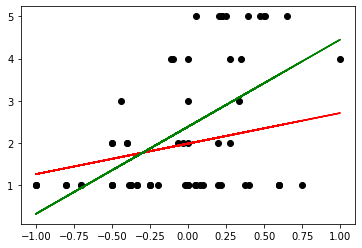

In [107]:
#TODO: Visualise the multiple regression line - i.e. line for crypto, line for not_crypto, then do p-test on regression line gradients.
#! Below uses mathematics to brute force plot the two separate lines (Cannot find supporting module that does it nicely)
plt.scatter(X_tr[:, 0], Y, color="black")
plt.plot(X_tr[:, 0], [model.coef_[0][0]]*X_tr[:,0] + model.intercept_, "r") # Plots non_crypto
plt.plot(X_tr[:, 0], [model.coef_[0][0]]*X_tr[:,0] + [model.coef_[0][2]]*X_tr[:,0] + model.coef_[0][1] + model.intercept_, "g") # Plots crypto
# plt.plot(X_tr[:, 0], model.coef_*X_tr + model.intercept_, "b") # Plots the interaction model

# beta3 = model.coef_[0][2]

In [108]:

import statsmodels.api as sm

X2 = sm.add_constant(X_tr)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

#! Based on results below it seems that the difference between the two. 
#! I might need to increase the sample size.
#! To address underfitting - look at features/model (from book)
#! Or maybe i'm underfitting e.g. Could use the sigmoid function to fit the scatter plot better.
    #! Rationale: Shift between slightly negatie and slightly positive has a signicant impact on rating.
#! Or is it because that I should use a two tailed t test instead, if just one tail, p-value is 0.052
## https://www.statisticssolutions.com/should-you-use-a-one-tailed-test-or-a-two-tailed-test-for-your-data-analysis/

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     6.670
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           0.000583
Time:                        17:32:10   Log-Likelihood:                -109.23
No. Observations:                  64   AIC:                             226.5
Df Residuals:                      60   BIC:                             235.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9872      0.287      6.915      0.0

[Interpreting the OLS Regression Results Sheet](https://www.youtube.com/watch?v=U7D1h5bbpcs)

In [109]:
# Regression with single 

# TODOS to potentially improve the p-value
# -> Investigate text classification algorithm to determine if p-value is problematic
# -> Increase sample size to get more texts that are classified into Deposits/withdrawals


### Logistic regression with statsmodels

In [117]:
Y
print(Y["rating"].max())

5.0


In [122]:
import statsmodels.api as sm

# Add constant to X and stnadardise Y for logistic regression
X_logit = sm.add_constant(X_tr)
Y_regular = (Y["rating"] - Y["rating"].min())/(Y["rating"].max()-Y["rating"].min())

# # Build model and fit with data
sm_model = sm.Logit(Y_regular, X_logit).fit()

print(sm_model.summary)

Optimization terminated successfully.
         Current function value: 0.437870
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 rating   No. Observations:                   64
Model:                          Logit   Df Residuals:                       60
Method:                           MLE   Df Model:                            3
Date:                Tue, 12 Jul 2022   Pseudo R-squ.:                  0.2290
Time:                        18:32:54   Log-Likelihood:                -28.024
converged:                       True   LL-Null:                       -36.348
Covariance Type:            nonrobust   LLR p-value:                 0.0008350
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1675      0.508     -2.296      0.022      -2.164      -0.171
x1             1.0319      1.191      0.866      0.386      -1.303       3.367
x2             0.2390      0.660      0.362      0.717      -1.055       1.533
x3             2.4917      1.761      1.415      0.157      -0.959       5.943
==============================================================================
"""

In [154]:
independent_var = X_logit[:, 1]
independent_var

array([ 0.        , -0.4375    ,  0.75      ,  0.        ,  0.6       ,
        0.275     ,  0.505     ,  0.35      ,  0.21666667, -0.33333333,
        0.6       , -0.01785714, -0.1       ,  0.        , -0.5       ,
        0.        ,  0.6       , -0.25      , -0.375     ,  0.225     ,
        0.        , -1.        , -0.7       ,  0.65      ,  0.20328526,
        0.05      , -0.5       , -0.03571429,  0.        ,  0.04791667,
        0.375     ,  0.2       , -0.38888889, -0.5       ,  0.19444444,
       -0.8       ,  0.08      , -0.2       , -0.403125  , -0.11      ,
        0.278125  , -0.4       , -0.25      , -0.25      , -0.375     ,
        0.225     , -1.        , -0.7       ,  0.475     , -1.        ,
       -0.33333333,  0.1       ,  0.33333333, -0.5       , -0.5       ,
        0.39444444,  1.        ,  0.25      , -0.8       ,  0.5       ,
        0.4       ,  0.05      , -0.06266667,  0.        ])

Optimization terminated successfully.
         Current function value: 0.598280
         Iterations 5


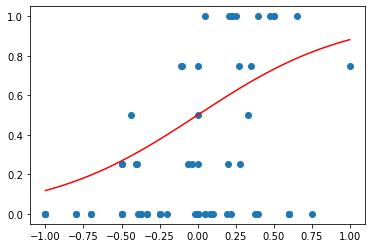

In [158]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

HOW_MANY = 100

# Plot the overall logistic regression model (i.e. without)
logit = sm.Logit(Y_regular,independent_var).fit()

# Make line function set of points s.t. (X=pred_input, Y=predictions)
pred_input = np.linspace(independent_var.min(),independent_var.max(),HOW_MANY)
predictions = logit.predict(pred_input)
plt.scatter(independent_var,Y_regular)
plt.plot(pred_input,predictions,c='red')
plt.show()